In [1]:
#  Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('/Users/elvislleshi/Desktop/Data mining 2/dm2_dataset_2425_imdb 3/imdb_cleaned_finale.csv')

# Zgjedhim vetëm këto veçori
selected_cols = [
    'runtimeMinutes', 'awardWins', 'totalCredits', 'criticReviewsTotal',
    'isAdult', 'ratingCount', 'companiesNumber', 'writerCredits', 'directorsCredits'
]

In [13]:
df

,originalTitle,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,...,ratingCount,countryOfOrigin,genres,companiesNumber,averageRating,writerCredits,directorsCredits,soundMixes,quotesTotal,durationYears
0,Carmencita,6,1894,1,0,2,0,4,3,short,...,2092,['US'],Documentary,3,5.7,0,1,silent,0,2.0
1,Un bon bock,6,1892,12,0,2,0,2,0,short,...,183,['FR'],Animation,0,5.4,0,1,silent,0,2.0
2,Chinese Opium Den,5,1894,1,0,1,0,1,0,short,...,195,['US'],Short,1,5.0,0,1,silent,0,2.0
3,Edison Kinetoscopic Record of a Sneeze,6,1894,1,1,3,0,4,2,short,...,2238,['US'],Documentary,6,5.4,0,1,silent,0,2.0
4,L'arrivée d'un train à La Ciotat,8,1896,1,0,12,0,11,16,short,...,13115,['FR'],Documentary,5,7.4,0,2,silent,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,7,1993,96,0,0,0,11,0,movie,...,11,['CO'],Documentary,2,7.0,1,1,mono,0,2.0
149527,Eco,7,2019,14,0,4,1,52,1,short,...,15,['ES'],Drama,3,6.4,1,1,stereo,0,2.0
149528,Women Take Center Stage,6,2019,30,0,2,3,32,0,tvEpisode,...,12,unknown,Reality-TV,0,5.6,0,0,dolby_digital,0,2.0
149529,Horrid Henry and the Christening Crisis,8,2011,10,0,1,0,15,0,tvEpisode,...,10,unknown,Adventure,0,7.1,3,1,stereo,0,2.0


In [3]:
# 1️⃣ Merr vetëm rreshtat që kanë genres të plotë (pa NaN)
df = df.dropna(subset=['genres'])

# 2️⃣ Zgjidh X dhe y
X = df[selected_cols]
y = df['genres']

# 3️⃣ Label Encoding për targetin
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# (Opsionale) Kontrollo shpërndarjen për të shmangur klasat shumë të rralla
genre_counts = pd.Series(y_encoded).value_counts()
print("📊 Shpërndarja e klasave të genres (encoded):")
print(genre_counts)

# 4️⃣ Train/test split me stratifikim
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)

# 5️⃣ Standardizim (nëse modelet e kërkojnë, si SVM, MLP, Logistic)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️⃣ (Opsionale) Ruaj emrat e klasave për analizë më vonë
class_names = le.classes_


📊 Shpërndarja e klasave të genres (encoded):
5     35984
8     25916
0     18931
7     13156
6     10150
2      9092
3      7852
22     3155
19     2788
28     2691
1      2612
4      2542
14     2332
9      1948
27     1734
12     1544
15     1168
25      790
20      742
24      723
10      662
23      612
21      589
17      555
18      508
16      390
13      261
26       99
11        5
Name: count, dtype: int64


In [5]:
# 1️⃣ Identifiko zhanret e rralla (<1000)
genre_counts = df['genres'].value_counts()
rare_genres = genre_counts[genre_counts < 1000].index

# 2️⃣ Krijo një kolonë të re me emrin "main_genre"
df['main_genre'] = df['genres'].apply(lambda x: 'Other' if x in rare_genres else x)

# 3️⃣ Label Encoding për targetin e ri
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['main_genre'])

# 4️⃣ Train-test split + standardizim
X = df[selected_cols]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5️⃣ Ruaj klasat
class_names = le.classes_

# 6️⃣ Printo rezultatet
print(f"\n✅ Klasa për 'main_genre': {len(class_names)}")
print("🎭 Emrat e klasave:", class_names)



✅ Klasa për 'main_genre': 18
🎭 Emrat e klasave: ['Action' 'Adult' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Game-Show' 'Horror' 'Music' 'Other'
 'Reality-TV' 'Short' 'Western' '\\N']


In [20]:
missing_genre_count = df[df['genres'] == '\\N'].shape[0]
print(f"📉 Numri i rreshtave me '\\\\N' si genres: {missing_genre_count}")


📉 Numri i rreshtave me '\\N' si genres: 2691


In [7]:
# 1️⃣ Zëvendëso vlerat '\N' me 'Other'
df['genres'] = df['genres'].replace('\\N', 'Other')

# 2️⃣ Rifresko grupimin për main_genre
genre_counts = df['genres'].value_counts()
rare_genres = genre_counts[genre_counts < 1000].index

df['main_genre'] = df['genres'].apply(lambda x: 'Other' if x in rare_genres else x)

# 3️⃣ Label Encoding për targetin e ri
le = LabelEncoder()
y = le.fit_transform(df['main_genre'])

# 4️⃣ Train-test split dhe standardizim
X = df[selected_cols]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5️⃣ Emrat e klasave
class_names = le.classes_
print(f"\n✅ Klasa për 'main_genre' pas përditësimit: {len(class_names)}")
print("🎭 Emrat e klasave:", class_names)



✅ Klasa për 'main_genre' pas përditësimit: 17
🎭 Emrat e klasave: ['Action' 'Adult' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Game-Show' 'Horror' 'Music' 'Other'
 'Reality-TV' 'Short' 'Western']


In [24]:
### Linear svm

🔁 Training Linear SVM with C=0.1, dual=True


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


✅ Accuracy: 0.2919
🔁 Training Linear SVM with C=1, dual=True


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


✅ Accuracy: 0.2924
🔁 Training Linear SVM with C=10, dual=True


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


✅ Accuracy: 0.2937
🔁 Training Linear SVM with C=0.1, dual=False
✅ Accuracy: 0.2920
🔁 Training Linear SVM with C=1, dual=False
✅ Accuracy: 0.2922
🔁 Training Linear SVM with C=10, dual=False
✅ Accuracy: 0.2922


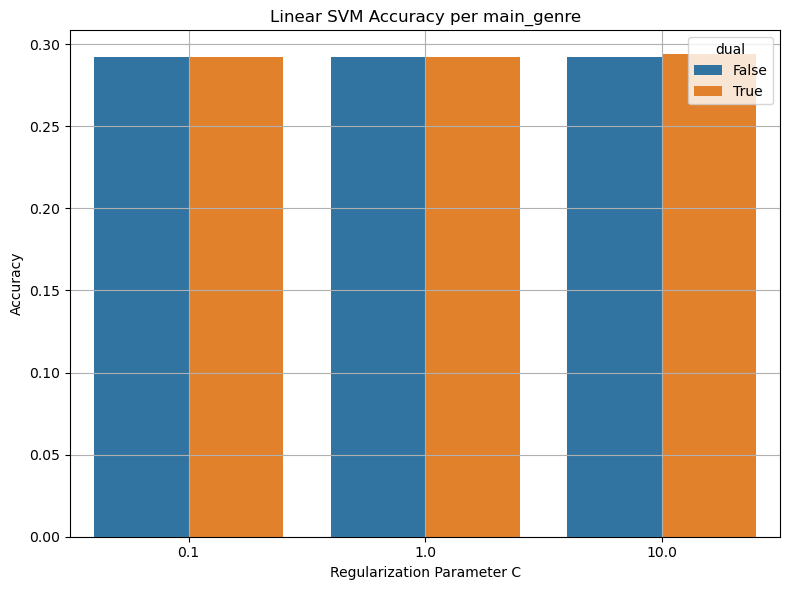


📊 Accuracy Table:
      C   dual  accuracy
0   0.1   True  0.291908
1   1.0   True  0.292376
2  10.0   True  0.293714
3   0.1  False  0.292020
4   1.0  False  0.292153
5  10.0  False  0.292176


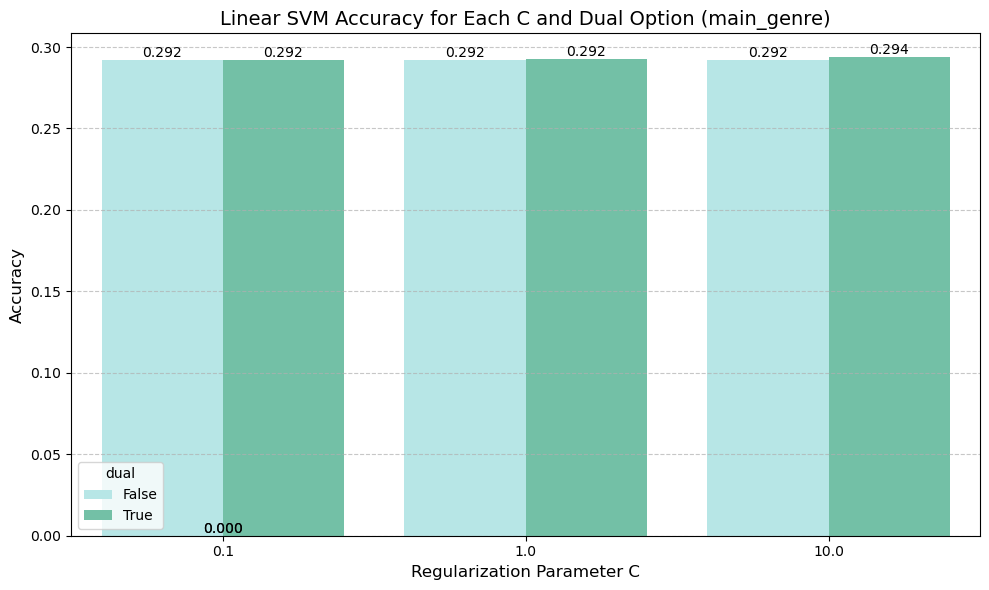

In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parametrat për testim
Cs = [0.1, 1, 10]
dual_options = [True, False]

# Ruajmë rezultatet
results = []

# Testim për çdo kombinim C dhe dual
for dual in dual_options:
    for C in Cs:
        print(f"🔁 Training Linear SVM with C={C}, dual={dual}")
        model = LinearSVC(C=C, dual=dual, max_iter=10000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"✅ Accuracy: {acc:.4f}")
        results.append({'C': C, 'dual': dual, 'accuracy': acc})

# Kthe në DataFrame
results_df = pd.DataFrame(results)

# 📊 Barplot standard
plt.figure(figsize=(8, 6))
sns.barplot(data=results_df, x='C', y='accuracy', hue='dual')
plt.title('Linear SVM Accuracy per main_genre')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# 📋 Tabela
print("\n📊 Accuracy Table:")
print(results_df)

# 📈 Grafik me vlera të dukshme dhe ngjyra pastel
palette = {True: 'mediumaquamarine', False: 'paleturquoise'}

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=results_df, x='C', y='accuracy', hue='dual', palette=palette)

# Shto vlerat sipër kolonave
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.3f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black')

plt.title('Linear SVM Accuracy for Each C and Dual Option (main_genre)', fontsize=14)
plt.xlabel('Regularization Parameter C', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_68058/2651311022.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues')


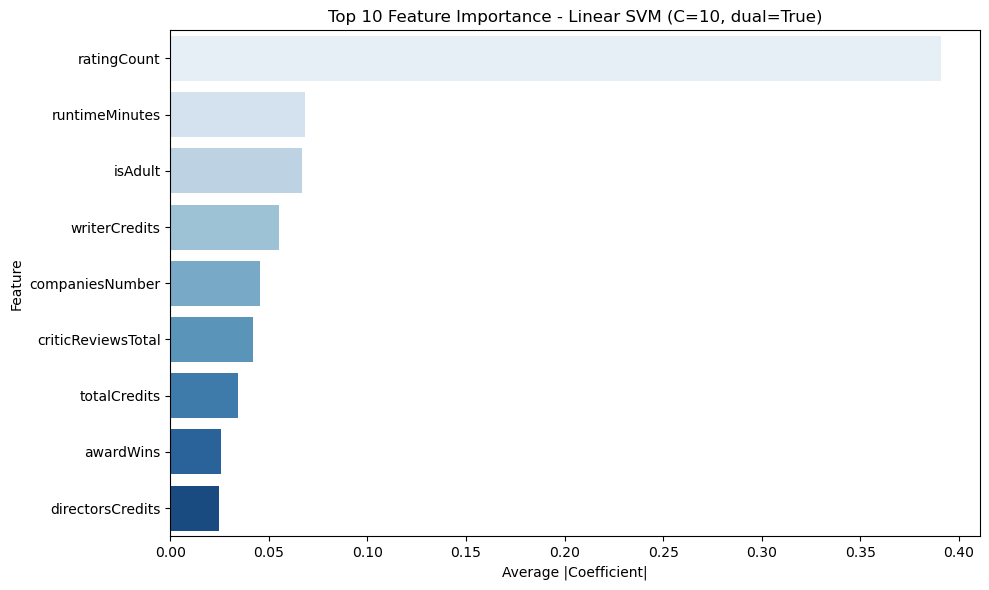

In [27]:
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Trajno modelin më të mirë
model = LinearSVC(C=10, dual=True, max_iter=10000)
model.fit(X_train, y_train)

# 2️⃣ Emrat e veçorive nga dataset-i real
feature_names = df[selected_cols].columns.tolist()

# 3️⃣ Merr koeficientët dhe llogarit rëndësinë
coefs = model.coef_
importance = np.mean(np.abs(coefs), axis=0)

# 4️⃣ Krijo DataFrame për top 10 veçoritë
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False).head(10)

# 5️⃣ Vizualizo
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues')
plt.title('Top 10 Feature Importance - Linear SVM (C=10, dual=True)')
plt.xlabel('Average |Coefficient|')
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the n

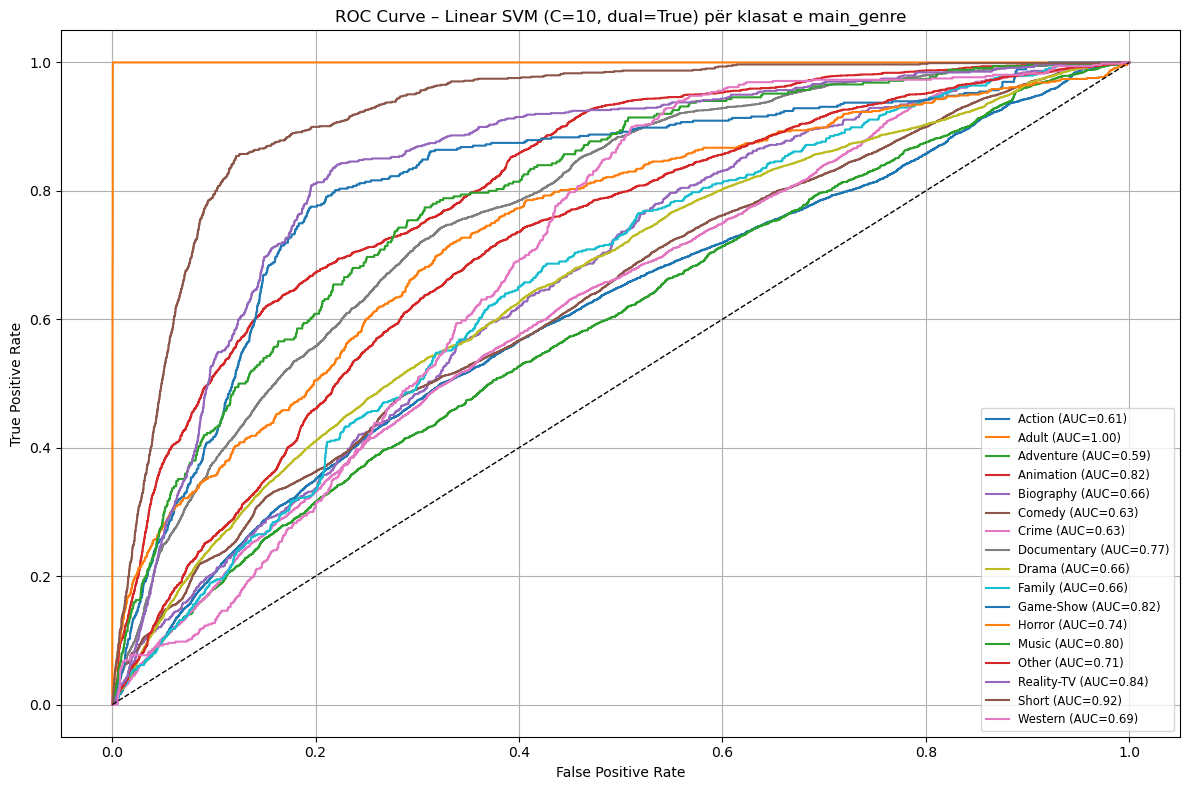

In [34]:
from sklearn.preprocessing import label_binarize
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize y_test
n_classes = len(np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Trajno modelin më të mirë (nëse nuk është më aktiv)
best_model = OneVsRestClassifier(LinearSVC(C=10, dual=True, max_iter=10000))
best_model.fit(X_train, y_train)
y_score = best_model.decision_function(X_test)

# Vizato ROC për klasat ekzistuese në test
fpr, tpr, roc_auc = {}, {}, {}
available_classes = np.where(np.sum(y_test_bin, axis=0) > 0)[0]

plt.figure(figsize=(12, 8))
for i in available_classes:
    try:
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC={roc_auc[i]:.2f})')
    except ValueError:
        print(f"⚠️ Skipping class {i} – not enough variation to compute ROC.")
        continue

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('ROC Curve – Linear SVM (C=10, dual=True) për klasat e main_genre')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# 1️⃣ Trajno modelin mbi target normal (jo binarizim)
svm_model = LinearSVC(C=10, dual=True, max_iter=10000)
svm_model.fit(X_train, y_train)

# 2️⃣ Predikimet
y_pred = svm_model.predict(X_test)

# 3️⃣ Classification report
report = classification_report(y_test, y_pred, target_names=class_names)
accuracy = accuracy_score(y_test, y_pred)

# 4️⃣ Printo
print("📋 Classification Report – Linear SVM (C=10, dual=True) për main_genre:\n")
print(report)
print(f"🎯 Overall Accuracy: {accuracy:.4f}")


📋 Classification Report – Linear SVM (C=10, dual=True) për main_genre:

              precision    recall  f1-score   support

      Action       0.24      0.02      0.03      5679
       Adult       0.97      1.00      0.98       784
   Adventure       0.00      0.00      0.00      2728
   Animation       0.42      0.05      0.09      2356
   Biography       0.00      0.00      0.00       763
      Comedy       0.27      0.78      0.41     10795
       Crime       0.41      0.01      0.02      3045
 Documentary       0.31      0.16      0.22      3947
       Drama       0.29      0.39      0.34      7775
      Family       0.00      0.00      0.00       584
   Game-Show       0.00      0.00      0.00       463
      Horror       0.31      0.02      0.05       700
       Music       0.00      0.00      0.00       350
       Other       0.00      0.00      0.00      2588
  Reality-TV       0.00      0.00      0.00       836
       Short       0.35      0.04      0.07       947
     West

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

In [7]:
#Non linear svm

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Parametrat që do testojmë
kernels = ['rbf', 'poly', 'sigmoid']
gammas = ['auto', 'scale']
Cs = [0.1, 1, 10]

results = []

# Loop për çdo kombinim
for kernel in kernels:
    for gamma in gammas:
        for C in Cs:
            model = SVC(kernel=kernel, gamma=gamma, C=C, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            
            results.append({
                'Kernel': kernel,
                'Gamma': gamma,
                'C': C,
                'Accuracy': acc
            })

# Konverto në DataFrame për analizë
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Shfaq rezultatet
import ace_tools as tools; tools.display_dataframe_to_user(name="SVM Parameter Tuning Results", dataframe=results_df)


📄 Classification Report:
              precision    recall  f1-score   support

      Action       0.33      0.23      0.27      5679
       Adult       0.97      1.00      0.98       784
   Adventure       0.52      0.02      0.04      2728
   Animation       0.39      0.21      0.27      2356
   Biography       0.36      0.01      0.02       763
      Comedy       0.33      0.63      0.43     10795
       Crime       0.51      0.03      0.05      3045
 Documentary       0.29      0.35      0.32      3947
       Drama       0.32      0.50      0.39      7775
      Family       0.00      0.00      0.00       584
   Game-Show       0.41      0.02      0.04       463
      Horror       0.32      0.05      0.09       700
       Music       0.00      0.00      0.00       350
       Other       0.25      0.01      0.03      2588
  Reality-TV       0.38      0.01      0.01       836
       Short       0.30      0.18      0.23       947
     Western       0.92      0.07      0.12       520

 

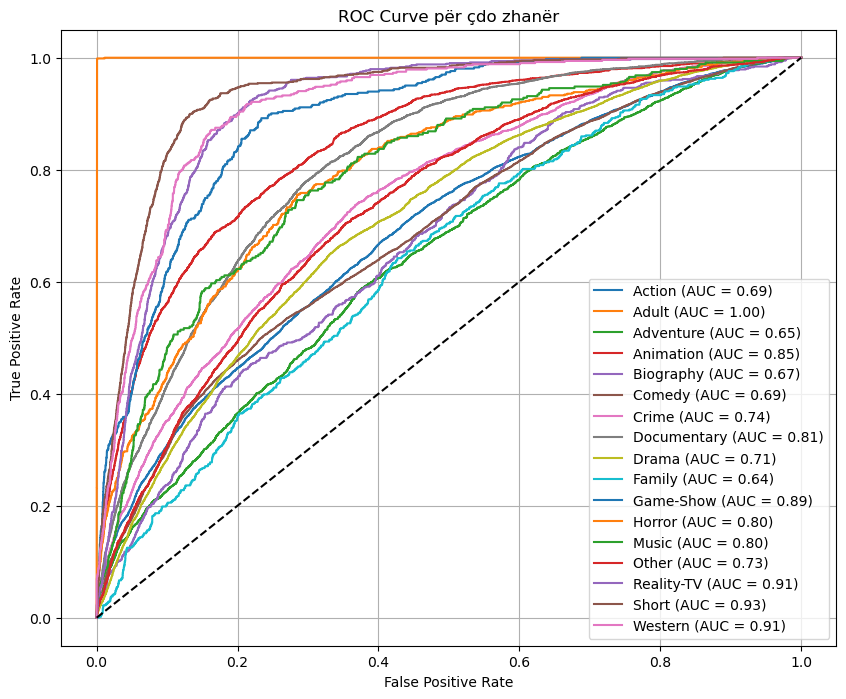

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC
import shap

# 1. Trajno modelin më të mirë
best_svm = SVC(kernel='rbf', gamma='scale', C=10, probability=True, random_state=42)
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

# 2. Classification Report
print("📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# 3. ROC Curve për çdo klasë
y_score = best_svm.predict_proba(X_test)
y_test_binarized = label_binarize(y_test, classes=range(len(class_names)))

fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve për çdo zhanër")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

